In [44]:
!pip install torch


In [43]:

import torch
import numpy as np



In [45]:
torch.tensor(5)

tensor(5)

In [46]:
import torch
import numpy as np


a = torch.tensor([[1,2],[3,4]])
print(a)


arr = np.array([1,2,3])
b = torch.from_numpy(arr)
print(b)

c = torch.rand(2,3)
print(c)

d = torch.zeros(3,3)
e = torch.ones(2,2)
print(d)
print(e)


# GPU Tensor 
if torch.cuda.is_available():
    f = torch.tensor([1,2,3]).cuda()
print(f)






tensor([[1, 2],
        [3, 4]])
tensor([1, 2, 3])
tensor([[0.2066, 0.2753, 0.8247],
        [0.6939, 0.3632, 0.4413]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


NameError: name 'f' is not defined

In [17]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)

print(x)
print(y)

print(x + y)     
print(x * y)     
print(torch.matmul(x,y))
print(x.T)         


tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[1., 3.],
        [2., 4.]])


In [18]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 5
y.backward()    
print(x.grad)    


tensor(7.)


In [21]:
 
X = torch.rand(100,1)                 #rand not contains nagative foem {0 to 1} 
y = 3*X + 2 + 0.1*torch.rand(100,1)


w = torch.randn(1, requires_grad=True)      #randn Normal Distribution (Gaussian) {- & to &} 
b = torch.randn(1, requires_grad=True)
lr = 0.1

for epoch in range(100):
    # forward
    y_pred = w*X + b

    # loss
    loss = torch.mean((y - y_pred)**2)   #MSE

    # backward
    loss.backward()

    # update
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # reset grads
    w.grad.zero_()
    b.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}, w={w.item():.2f}, b={b.item():.2f}")

print(f"y = {w.item()}x + {b.item()}")    # w.item()   -> current real value to w  


Epoch 0: loss=6.9349, w=0.20, b=1.65
Epoch 10: loss=0.3071, w=1.23, b=2.91
Epoch 20: loss=0.2170, w=1.50, b=2.86
Epoch 30: loss=0.1630, w=1.71, b=2.75
Epoch 40: loss=0.1225, w=1.88, b=2.66
Epoch 50: loss=0.0922, w=2.03, b=2.57
Epoch 60: loss=0.0694, w=2.16, b=2.50
Epoch 70: loss=0.0523, w=2.28, b=2.44
Epoch 80: loss=0.0395, w=2.38, b=2.39
Epoch 90: loss=0.0299, w=2.46, b=2.34
y = 2.5280017852783203x + 2.305668830871582


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

x


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  #one layer bacause  inear (1,1)--> one node takes one input and produce one output ,linear-->  y=w*x+b
        
        #  self.linear = nn.Linear(2, 2) # one layer with 2 neurons: each neuron takes 2 inputs and produces 1 output # => total outputs = 2
    def forward(self, x):    
        return self.linear(x)            #forward --> ypredic=w*x+b



model = LinearRegressionModel()


criterion = nn.MSELoss()


optimizer = optim.SGD(model.parameters(), lr=0.1)


for epoch in range(100):
    # forward
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward
    optimizer.zero_grad()   
    loss.backward()   
    optimizer.step() #update      

    if epoch % 10 == 0:
        w, b = model.linear.weight.item(), model.linear.bias.item()
        print(f"Epoch {epoch}: loss={loss.item():.4f}, w={w:.2f}, b={b:.2f}")
w, b = model.linear.weight.item(), model.linear.bias.item()
print(f" y = {w:.2f}x + {b:.2f}")


Epoch 0: loss=13.2235, w=0.50, b=0.76
Epoch 10: loss=0.1657, w=1.79, b=2.60
Epoch 20: loss=0.0987, w=2.00, b=2.61
Epoch 30: loss=0.0732, w=2.14, b=2.54
Epoch 40: loss=0.0544, w=2.26, b=2.47
Epoch 50: loss=0.0405, w=2.36, b=2.41
Epoch 60: loss=0.0302, w=2.45, b=2.36
Epoch 70: loss=0.0225, w=2.52, b=2.32
Epoch 80: loss=0.0169, w=2.59, b=2.28
Epoch 90: loss=0.0127, w=2.64, b=2.25
 y = 2.69x + 2.23


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim


X = torch.randn(100, 2)   
y = (X[:,0] + X[:,1] > 0).float().unsqueeze(1)  



class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)   # input=2, hidden=4
        self.fc2 = nn.Linear(4, 1)   # hidden=4, output=1
        self.sigmoid = nn.Sigmoid()  #  Binary

    def forward(self, x):
        x = torch.relu(self.fc1(x))   #  apply ReLU activation on layer1 output
        x = self.sigmoid(self.fc2(x)) # sigmoid on output layer
        return x

model = SimpleNN()

criterion = nn.BCELoss()          # Binary Cross Entropy
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(100):
    # Forward
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}")

with torch.no_grad():
    test_point = torch.tensor([[0.5, -0.2]])
    pred = model(test_point)
    print("Prediction:", pred.item())


Epoch 0: loss=0.7393
Epoch 10: loss=0.7090
Epoch 20: loss=0.6849
Epoch 30: loss=0.6600
Epoch 40: loss=0.6334
Epoch 50: loss=0.6010
Epoch 60: loss=0.5656
Epoch 70: loss=0.5250
Epoch 80: loss=0.4847
Epoch 90: loss=0.4460
Prediction: 0.4690324664115906


In [32]:

import torch
from torchvision import datasets, transforms


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:16<00:00, 605505.33it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 146861.41it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:03<00:00, 425659.33it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 716508.53it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/5, Loss: 1.0492
Epoch 2/5, Loss: 0.3880
Epoch 3/5, Loss: 0.3250
Epoch 4/5, Loss: 0.2869
Epoch 5/5, Loss: 0.2579


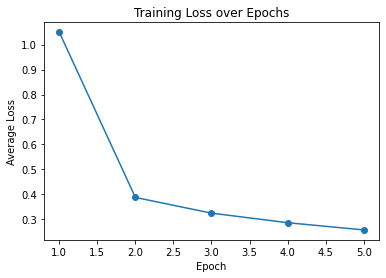

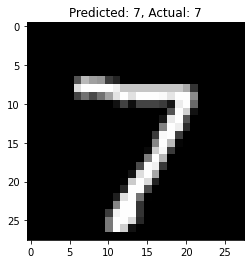

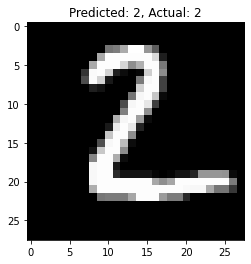

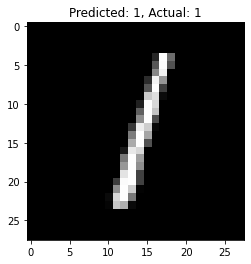

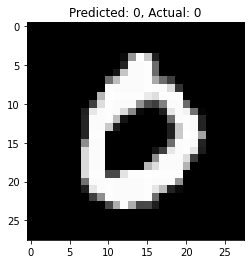

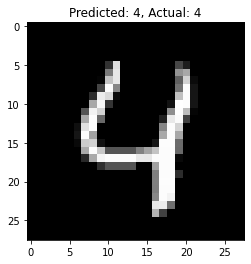

Accuracy: 96.88%


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# FCNN
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)     #-1 mean batch size is selected automatically by PyTorch  based on the total number of elements and the other dimensions.
                                  #x.view(4,28*28) means 4 images each one width 28 , height 28
                                  #-1 means pytorch select number of images in batch 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


epochs = 5
loss_list = []

for epoch in range(epochs):
    epoch_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# ----  Loss ----
plt.plot(range(1, epochs+1), loss_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Training Loss over Epochs")
plt.show()


total = 0
correct = 0

with torch.no_grad():
    
    for i, (images, labels) in enumerate(test_loader):
        output = model(images)
        _, predicted = torch.max(output.data, 1)

    
        for j in range(5):
            plt.imshow(images[j].squeeze(), cmap='gray')
            plt.title(f"Predicted: {predicted[j].item()}, Actual: {labels[j].item()}")
            plt.show()
        
       
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        break  

print(f"Accuracy: {100 * correct / total:.2f}%")



#----------week3-------------------


DeepNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/5], Loss: 1.4873
Epoch [2/5], Loss: 0.4414
Epoch [3/5], Loss: 0.3460
Epoch [4/5], Loss: 0.3024
Epoch [5/5], Loss: 0.2696


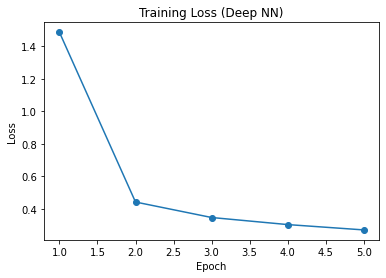

Accuracy: 92.29%


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = DeepNN()
print(model)


criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)


epochs = 5
loss_list = []

#training 
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()       
        optimizer.step()      
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
    
plt.plot(range(1, epochs+1), loss_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (Deep NN)")
plt.show()

#evaluation
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


#Regularization


DeepNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/5], Loss: 1.6135
Epoch [2/5], Loss: 0.5406
Epoch [3/5], Loss: 0.4085
Epoch [4/5], Loss: 0.3536
Epoch [5/5], Loss: 0.3112


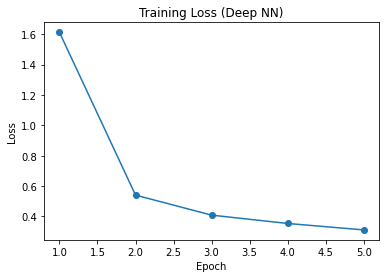

Accuracy: 91.65%


In [8]:
#dropout & weight_decay

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        
        x = self.dropout(F.relu(self.fc2(x)))
       
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = DeepNN()
print(model)


criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01) 

#optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)   with weight_decay

# weight_decay gives punishment to large weights to prevent overfitting and make the model generalize better

epochs = 5
loss_list = []

#training 
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()       
        optimizer.step()      
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
    
plt.plot(range(1, epochs+1), loss_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (Deep NN)")
plt.show()

#evaluation
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


DeepNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/15], Loss: 1.5735
Epoch [2/15], Loss: 0.5376
Epoch [3/15], Loss: 0.3986
Epoch [4/15], Loss: 0.3414
Epoch [5/15], Loss: 0.3027
Epoch [6/15], Loss: 0.2693
Epoch [7/15], Loss: 0.2431
Epoch [8/15], Loss: 0.2229
Epoch [9/15], Loss: 0.2011
Epoch [10/15], Loss: 0.1853
Epoch [11/15], Loss: 0.1715
Epoch [12/15], Loss: 0.1572
Epoch [13/15], Loss: 0.1462
Epoch [14/15], Loss: 0.1380
Epoch [15/15], Loss: 0.1289


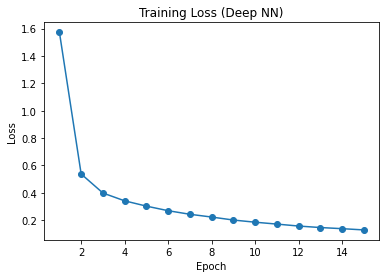

Accuracy: 95.67%


In [13]:
#weight_decay

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.3)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        
        x = self.dropout(F.relu(self.fc2(x)))
       
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = DeepNN()
print(model)


criterion = nn.CrossEntropyLoss()

#optimizer = optim.SGD(model.parameters(), lr=0.01) 

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)   #with weight_decay

# weight_decay gives punishment to large weights to prevent overfitting and make the model generalize better

epochs = 15
loss_list = []

#training 
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()       
        optimizer.step()      
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
    
plt.plot(range(1, epochs+1), loss_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (Deep NN)")
plt.show()

#evaluation
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


| Aspect             | Gradient Descent                                | Weight Decay                                            |
| ------------------ | ----------------------------------------------- | ------------------------------------------------------- |
| Objective          | Minimize the loss only                          | Minimize both the loss **and** the magnitude of weights |
| Effect on Weights  | Updates weights based purely on gradients       | Gradually pulls weights toward zero                     |
| Purpose            | Learn from data                                 | Reduce overfitting and make the model generalize better |
| Risk if used alone | Weights might become too large (unstable model) | Keeps weights small and stable                          |
